In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))

# MLP (Multilayer Perceptron)

In [2]:
from scripts.dataset_loader import FashionMNIST, CIFAR10, split_large_dataset

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
seed_value = 21
batch_size=32

In [5]:
f_dataset = FashionMNIST(batch_size=batch_size, seed=seed_value)

train_ds = f_dataset.get_dataloader(train=True)
test_ds = f_dataset.get_dataloader(train=False)

for imgs, labels in train_ds.take(1):
    print("image batch shape: ", imgs.shape)
    print("X type: ", imgs.dtype)
    print("Label batch: ", labels.numpy())
    print("labels: ", f_dataset.text_labels(labels))


image batch shape:  (32, 28, 28, 1)
X type:  <dtype: 'float32'>
Label batch:  [9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4 3 1 4 8 4 3 0 2 4 4 5 3]
labels:  ['Ankle boot', 'Top/T-shirt', 'Top/T-shirt', 'Dress', 'Top/T-shirt', 'Pullover', 'Sneaker', 'Pullover', 'Sandal', 'Sandal', 'Top/T-shirt', 'Ankle boot', 'Sandal', 'Sandal', 'Sneaker', 'Ankle boot', 'Trouser', 'Top/T-shirt', 'Shirt', 'Coat', 'Dress', 'Trouser', 'Coat', 'Bag', 'Coat', 'Dress', 'Top/T-shirt', 'Pullover', 'Coat', 'Coat', 'Sandal', 'Dress']


In [6]:
c_dataset = CIFAR10(batch_size=batch_size, seed=seed_value)

train_ds_10 = c_dataset.get_dataloader(train=True)
test_ds_10 = c_dataset.get_dataloader(train=False)

for imgs2, labels2 in train_ds_10.take(1):
    print("image batch shape: ", imgs2.shape)
    print("X type: ", imgs2.dtype)
    print("Label batch: ", labels2.numpy())
    print("labels: ", c_dataset.text_labels(labels2))


image batch shape:  (32, 28, 28, 3)
X type:  <dtype: 'float32'>
Label batch:  [6 9 9 4 1 1 2 7 8 3 4 7 7 2 9 9 9 3 2 6 4 3 6 6 2 6 3 5 4 0 0 9]
labels:  ['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'cat', 'deer', 'horse', 'horse', 'bird', 'truck', 'truck', 'truck', 'cat', 'bird', 'frog', 'deer', 'cat', 'frog', 'frog', 'bird', 'frog', 'cat', 'dog', 'deer', 'airplane', 'airplane', 'truck']


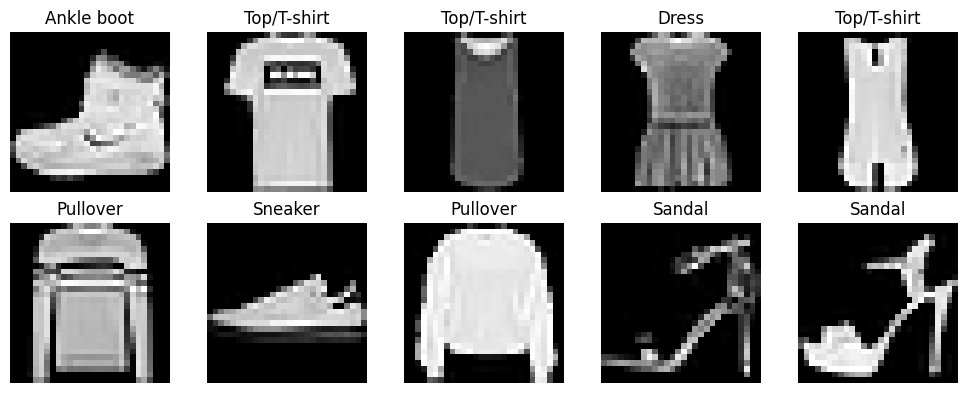

In [7]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(imgs[i].numpy().squeeze(), cmap='gray')
    plt.title(f_dataset.text_labels([labels[i]])[0])
    plt.axis('off')
plt.tight_layout()
plt.show()

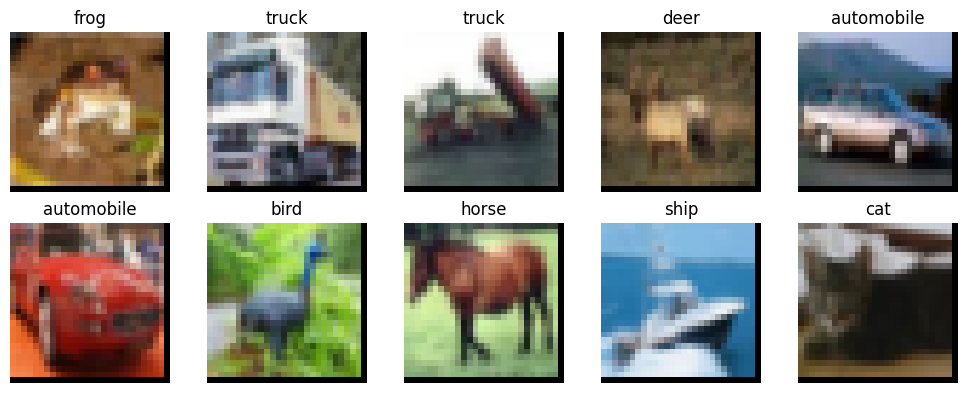

In [8]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(imgs2[i].numpy().squeeze(), cmap='gray')
    plt.title(c_dataset.text_labels([labels2[i]])[0])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [9]:
# Get input shape dynamically from dataset
for X, y in train_ds.take(1):
    input_shape = X.shape[1:]  # (28, 28, 1) for FashionMNIST
    print("Input shape:", input_shape)


Input shape: (28, 28, 1)


## Training the model on Fashion-MNIST

### Single hidden layer

Start with MLP with a single hidden layer and 256 hidden units. It's convenient for the number of hidden units to be divisible by larger powers of 2, for memory allocation reasons.

In [10]:
from scripts.model_loader import MLPscratch

In [11]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    min_delta=1e-4,
    restore_best_weights=True,
    verbose=1
)


In [12]:
num_classes = 10

mlp_model = MLPscratch(input_shape=input_shape, num_classes=num_classes, num_hiddens=256, seed_value=seed_value)
mlp_model.MLP(lr=5e-4)

train_data, val_data = split_large_dataset(train_ds, batch_size=batch_size, total_size=len(f_dataset.train_ds[0]))

history = mlp_model.mlp_model.fit(
    train_data,
    validation_data=val_data,
    epochs=50,
    callbacks=[early_stop]
)


Epoch 1/50
   1500/Unknown 5s 3ms/step - accuracy: 0.7713 - loss: 0.6655

e:\intro-to-ml-basics\basics-ml\Lib\site-packages\keras\src\trainers\epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7713 - loss: 0.6654 - val_accuracy: 0.8564 - val_loss: 0.4038
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8568 - loss: 0.3997 - val_accuracy: 0.8687 - val_loss: 0.3714
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8705 - loss: 0.3528 - val_accuracy: 0.8742 - val_loss: 0.3508
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8805 - loss: 0.3226 - val_accuracy: 0.8748 - val_loss: 0.3425
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8880 - loss: 0.3006 - val_accuracy: 0.8779 - val_loss: 0.3373
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8965 - loss: 0.2824 - val_accuracy: 0.8808 - val_loss: 0.3291
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9011 - loss: 0.2660 - val_accuracy: 0.8802 - val_loss: 0.3310
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.9054 - loss: 0.2534 - val_ac

In [13]:
test_loss, test_accuracy = mlp_model.mlp_model.evaluate(test_ds)
print(f"Test Accuracy with shallow MLP: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8736 - loss: 0.3620
Test Accuracy with shallow MLP: 87.46%


### Deeper model to increase the capacity

Three hidden layers with 512, 256 and 128 hidden units is added.

Param initialization is tied with the choice of non-linear activation function. It determines how quickly the model converges. He initialization is used with ReLU activation. 
Initialization is important to avoid vanishing or exploding gradients.

For fully connected layers without non-linearities:

$$
o_i = \sum_{j=1}^{n_{in}} w_{ij}x_i
 $$

where, 
$
X \sim \mathcal{N}\left(0, \gamma^2\right)
$ and, 
$
W \sim \mathcal{N}\left(0, \sigma^2\right)
$.

So, the variance of the output in forward pass, 
$$
Var[o_i] = n_{in}\sigma^2\gamma^2
$$

For a fixed variance, $n_{in}\sigma^2 = 1$. Similarly, for the backward pass, $n_{out}\sigma^2 = 1$

As, both conditions can't be satisfied simultaneously, we take instead, 
$$ \frac{1}{2}(n_{in}+n_{out})\sigma^2 = 1 $$

this is called Xavier initialization (Glorot).

In the case of He initialization, as ReLU activation zeros out the negative initialization (about 50%),
He normal initialization:

$$
W \sim \mathcal{N}\left(0, \frac{2}{n_{\text{in}}}\right)
$$

or, for uniform distribution, as variance is $\frac{a^2}{3}$,
$$
W \sim \mathcal{U}\left(-\sqrt{\frac{6}{n_{\text{in}}}}, \sqrt{\frac{6}{n_{\text{in}}}} \right)
$$

#### Adding dropout layers to break symmetry in parameterization.

Due to the permutation symmetry among the hidden units of each layer, if any two hidden units in a single layer have the same weights and biases, they become redundant, and the architecture appears smaller than the actual capacity. 
Each intermediate activation is replaced by,
$$
h' =
\begin{cases}
0 & \text{with dropout probability p } \\
\frac{h}{1-p} & \text{otherwise }
\end{cases}
$$
while the expectation remains unchanges, $E[h'] = h$

In [14]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1
)
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'best.keras', monitor='val_loss', save_best_only=True
)

In [15]:
from scripts.dying_neuron_test import DyingNeuronMonitor

# Instantiate your model
deep_model = MLPscratch(input_shape=input_shape, num_classes=num_classes, seed_value=seed_value)
deep_model.deeperMLP(lr=1e-4)

# Prepare the dying neuron monitor callback
monitor = DyingNeuronMonitor(data=val_data, threshold=0.99) #look for neurons that are inactive 99% of the time

# Train with both early stopping and dying neuron monitoring
history_deeper = deep_model.model.fit(
    train_data.repeat(),  # ensure no data exhaustion
    validation_data=val_data.repeat(),
    epochs=100,
    callbacks=[early_stop, reduce_lr, checkpoint], #add monitor to check for dying neurons using relu activation
    steps_per_epoch=1500,   # len(train data)//batch size
    validation_steps=375   # len(val data)//batch size
)


Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.6400 - loss: 1.2615 - val_accuracy: 0.8390 - val_loss: 0.6271 - learning_rate: 1.0000e-04
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.8139 - loss: 0.7138 - val_accuracy: 0.8584 - val_loss: 0.5614 - learning_rate: 1.0000e-04
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.8341 - loss: 0.6414 - val_accuracy: 0.8679 - val_loss: 0.5342 - learning_rate: 1.0000e-04
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.8476 - loss: 0.5923 - val_accuracy: 0.8696 - val_loss: 0.5269 - learning_rate: 1.0000e-04
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.8566 - loss: 0.5624 - val_accuracy: 0.8740 - val_loss: 0.5023 - learning_rate: 1.0000e-04
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 26ms/step - accuracy: 0.8659 - loss: 0.5324 - val_accuracy: 0.8786 - val_loss: 0.4917 - learning_rate: 1.0000e-04
Epoch 7/100
1500/1500 ━━━━━━━━━━━━

In [16]:
test_loss_d, test_accuracy_d = deep_model.model.evaluate(test_ds)
print(f"Test Accuracy with a deeper MLP: {test_accuracy_d * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8826 - loss: 0.4705
Test Accuracy with a deeper MLP: 88.11%


Test accuracy is 1.59% less than training accuracy for the deeper MLP. So, we can say that the model is not overfitting. But there isn't a drastic impovement with model complexity. That indicates that the fashion MNIST dataset doesnot benefit greatly from a higher model capacity.

The deeper model may have a higher test loss than the shallow model, but it has a higher accuracy.

## Plotting the model training

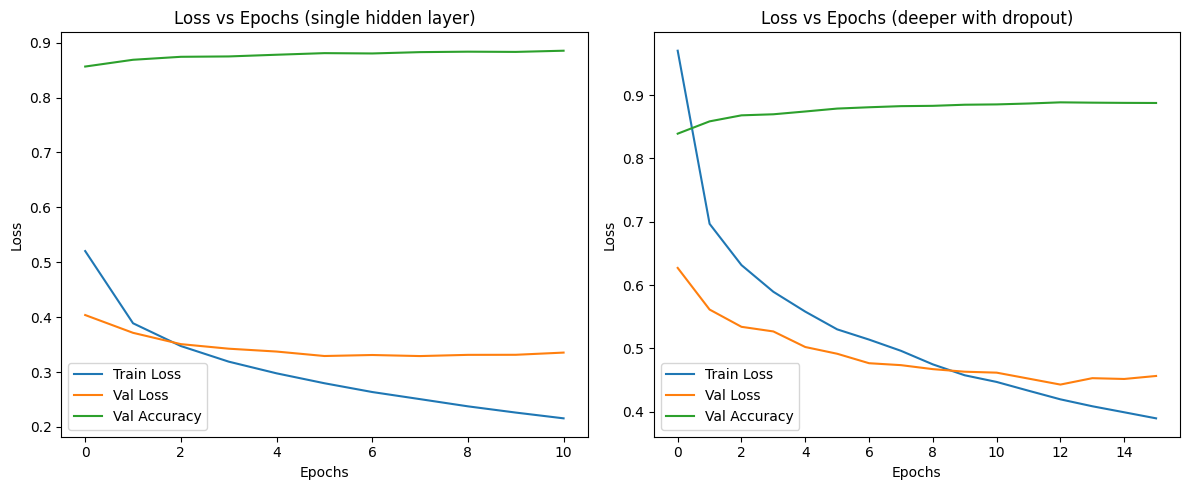

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot 1: Trained with single hidden layer MLP
axes[0].plot(history.history['loss'], label='Train Loss')
axes[0].plot(history.history['val_loss'], label='Val Loss')
axes[0].plot(history.history['val_accuracy'], label='Val Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].set_title('Loss vs Epochs (single hidden layer)')
axes[0].legend()

# Plot 2: Deeper MLP with dropout
axes[1].plot(history_deeper.history['loss'], label='Train Loss')
axes[1].plot(history_deeper.history['val_loss'], label='Val Loss')
axes[1].plot(history_deeper.history['val_accuracy'], label='Val Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].set_title('Loss vs Epochs (deeper with dropout)')
axes[1].legend()

plt.tight_layout()  # Auto-adjust spacing between plots
plt.show()


## Testing on  CIFAR-10 dataset

In [18]:
# Get input shape dynamically from dataset
for X, y in train_ds_10.take(1):
    input_shape_c = X.shape[1:]  
    print("Input shape:", input_shape_c)


Input shape: (28, 28, 3)


In [19]:
num_classes = 10

mlp_model_on_c = MLPscratch(input_shape=input_shape_c, num_classes=num_classes, num_hiddens=256, seed_value=seed_value)
mlp_model_on_c.MLP(lr=5e-4)

train_data_c, val_data_c = split_large_dataset(train_ds_10, batch_size=batch_size, total_size=len(c_dataset.train_ds[0]))

history_on_c = mlp_model_on_c.mlp_model.fit(
    train_data_c,
    validation_data=val_data_c,
    epochs=50,
    callbacks=[early_stop]
)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.2835 - loss: 1.9861 - val_accuracy: 0.3511 - val_loss: 1.8045
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.3841 - loss: 1.7244 - val_accuracy: 0.3832 - val_loss: 1.7254
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.4167 - loss: 1.6457 - val_accuracy: 0.3995 - val_loss: 1.6950
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.4367 - loss: 1.5967 - val_accuracy: 0.4058 - val_loss: 1.6785
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.4507 - loss: 1.5594 - val_accuracy: 0.4122 - val_loss: 1.6570
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.4638 - loss: 1.5282 - val_accuracy: 0.4159 - val_loss: 1.6540
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.4697 - loss: 1.5036 - val_accuracy: 0.4248 - val_loss: 1.6263
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.4769 - l

In [20]:
test_loss, test_accuracy = mlp_model_on_c.mlp_model.evaluate(test_ds_10)
print(f"Test Accuracy with a shallow MLP: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4653 - loss: 1.5390
Test Accuracy with a shallow MLP: 46.11%


### Using deeper MLP on CIFAR

In [25]:
checkpoint_c = tf.keras.callbacks.ModelCheckpoint(
    'saved_models/best_cifar10.keras', monitor='val_loss', save_best_only=True
)

In [22]:
from scripts.dying_neuron_test import DyingNeuronMonitor

# Instantiate your model
deep_model_on_c = MLPscratch(input_shape=input_shape_c, num_classes=num_classes, seed_value=seed_value)
deep_model_on_c.deeperMLP(lr=1e-4, num_hidden1=1024, num_hidden2=512, num_hidden3=256, dropout_rate1=0.3, dropout_rate2=0.4, dropout_rate3=0.5, slope=0.09)

# Prepare the dying neuron monitor callback
monitor = DyingNeuronMonitor(data=val_data_c, threshold=0.99) #look for neurons that are inactive 99% of the time

# Train with both early stopping and dying neuron monitoring
history_deeper_on_c = deep_model_on_c.model.fit(
    train_data_c.repeat(),  # ensure no data exhaustion
    validation_data=val_data_c.repeat(),
    epochs=100,
    callbacks=[early_stop, reduce_lr, checkpoint], #add monitor to check for dying neurons using relu activation
    steps_per_epoch=1500,   # len(train data)//batch size
    validation_steps=375   # len(val data)//batch size
)


Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 66s 41ms/step - accuracy: 0.2423 - loss: 2.6978 - val_accuracy: 0.4114 - val_loss: 2.0189 - learning_rate: 1.0000e-04
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 30ms/step - accuracy: 0.3389 - loss: 2.2501 - val_accuracy: 0.4250 - val_loss: 1.9638 - learning_rate: 1.0000e-04
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.3796 - loss: 2.0897 - val_accuracy: 0.4367 - val_loss: 1.9301 - learning_rate: 1.0000e-04
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - accuracy: 0.4085 - loss: 1.9998 - val_accuracy: 0.4604 - val_loss: 1.8534 - learning_rate: 1.0000e-04
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.4298 - loss: 1.9242 - val_accuracy: 0.4675 - val_loss: 1.8308 - learning_rate: 1.0000e-04
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.4536 - loss: 1.8596 - val_accuracy: 0.4633 - val_loss: 1.8345 - learning_rate: 1.0000e-04
Epoch 7/100
1500/1500 ━━━━━━━━━━━━

In [23]:
test_loss_d, test_accuracy_d = deep_model_on_c.model.evaluate(test_ds_10)
print(f"Test Accuracy with a deeper MLP: {test_accuracy_d * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4942 - loss: 1.6994
Test Accuracy with a deeper MLP: 48.93%


There is a slight increase in accuracy, but a more complex model is needed to achieve a satisfactory result.

## Plotting the training

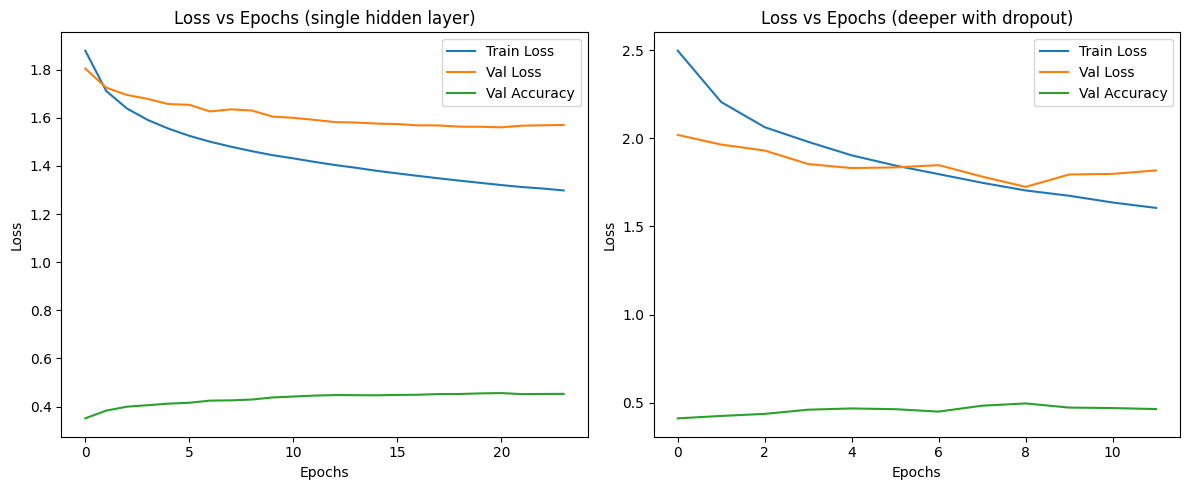

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot 1: Trained with single hidden layer MLP
axes[0].plot(history_on_c.history['loss'], label='Train Loss')
axes[0].plot(history_on_c.history['val_loss'], label='Val Loss')
axes[0].plot(history_on_c.history['val_accuracy'], label='Val Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].set_title('Loss vs Epochs (single hidden layer)')
axes[0].legend()

# Plot 2: Deeper MLP with dropout
axes[1].plot(history_deeper_on_c.history['loss'], label='Train Loss')
axes[1].plot(history_deeper_on_c.history['val_loss'], label='Val Loss')
axes[1].plot(history_deeper_on_c.history['val_accuracy'], label='Val Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].set_title('Loss vs Epochs (deeper with dropout)')
axes[1].legend()

plt.tight_layout()  # Auto-adjust spacing between plots
plt.show()
